#Preprocessing

### Import package

In [1]:
!pip install mido==1.2.9
!pip install fluidsynth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fluidsynth: filename=fluidsynth-0.2-py3-none-any.whl size=4488 sha256=0ab7211283ddec34ff50e0a3a5c301a1443a54c883f4d793d88a3a88c4d44953
  Stored in directory: /root/.cache/pip/wheels/72/5a/bf/347b142f199fb1bea87f16f8970916226951bc359c947ba19b
Successfully built fluidsynth


In [2]:
!pip install midi2audio 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from __future__ import print_function
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mido import MidiFile
import fluidsynth
import soundfile as sf
import librosa
import librosa.display
from IPython.display import Audio

### Loading data

In [4]:
Original_melody_midi = "Twinkle_melody.mid"

twinkle = MidiFile(Original_melody_midi, clip=True)
print(twinkle)


<midi file 'Twinkle_melody.mid' type 1, 1 tracks, 126 messages>


In [5]:
for msg in twinkle.tracks[0]:
  print(msg)

<meta message track_name name='å°\x8fæ\x8f\x90ç\x90´' time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
<meta message key_signature key='C' time=0>
<meta message set_tempo tempo=500000 time=0>
control_change channel=0 control=121 value=0 time=0
control_change channel=0 control=100 value=0 time=0
control_change channel=0 control=101 value=0 time=0
control_change channel=0 control=6 value=12 time=0
control_change channel=0 control=100 value=127 time=0
control_change channel=0 control=101 value=127 time=0
program_change channel=0 program=40 time=0
control_change channel=0 control=7 value=100 time=0
control_change channel=0 control=10 value=64 time=0
control_change channel=0 control=91 value=0 time=0
control_change channel=0 control=93 value=0 time=0
<meta message midi_port port=0 time=0>
note_on channel=0 note=72 velocity=80 time=0
control_change channel=0 control=2 value=80 time=0
control_change channel=1 control=121 

In [6]:
!apt install fluidsynth
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libfluidsynth2 libinstpatch-1.0-2 qsynth
  timgm6mb-soundfont
Suggested packages:
  fluid-soundfont-gs timidity jackd musescore
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libfluidsynth2 libinstpatch-1.0-2 qsynth
  timgm6mb-soundfont
0 upgraded, 6 newly installed, 0 to remove and 24 not upgraded.
Need to get 126 MB of archives.
After this operation, 157 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fluid-soundfont-gm all 3.1-5.1 [119 MB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libinstpatch-1.0-2 amd64 1.1.2-2build1 [238 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 timgm6mb-soundfont all 1.3-3 [5,420 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/universe amd64 libfluidsynth2 amd64 2.1.1-2 [

### MID to WAV

In [7]:
!fluidsynth -ni font.sf2 Twinkle_full.mid -F Twinkle_full.wav -r 44100
Audio('Twinkle_full.wav',rate =44100)

Output hidden; open in https://colab.research.google.com to view.

In [8]:
!fluidsynth -ni font.sf2 Twinkle_melody.mid -F Twinkle_melody.wav -r 44100
Audio('Twinkle_melody.wav',rate =44100)

Output hidden; open in https://colab.research.google.com to view.

In [9]:
!fluidsynth -ni font.sf2 Twinkle_piano.mid -F Twinkle_piano.wav -r 44100
Audio('Twinkle_piano.wav',rate =44100)

Output hidden; open in https://colab.research.google.com to view.

### Convert the instrument to the correct intrument

In [10]:
#Convert the instrument
from music21 import converter,instrument

instr_select = 'Piano' #Change this to the instrument of the performer
s = converter.parse('Twinkle_melody.mid')

for el in s.recurse():
    if 'Instrument' in el.classes:
        if instr_select == 'Piano':
            el.activeSite.replace(el, instrument.Piano())
        if instr_select == 'Violin':
            el.activeSite.replace(el, instrument.Violin())
        #Implement more instrument here if we add more instruments

s.write('midi', 'Twinkle_melody_piano.mid')

'Twinkle_melody_piano.mid'

In [11]:
!fluidsynth -ni font.sf2 Twinkle_melody_piano.mid -F Twinkle_melody_piano.wav -r 44100
Audio('Twinkle_melody_piano.wav',rate =44100)

Output hidden; open in https://colab.research.google.com to view.

### Load the recording

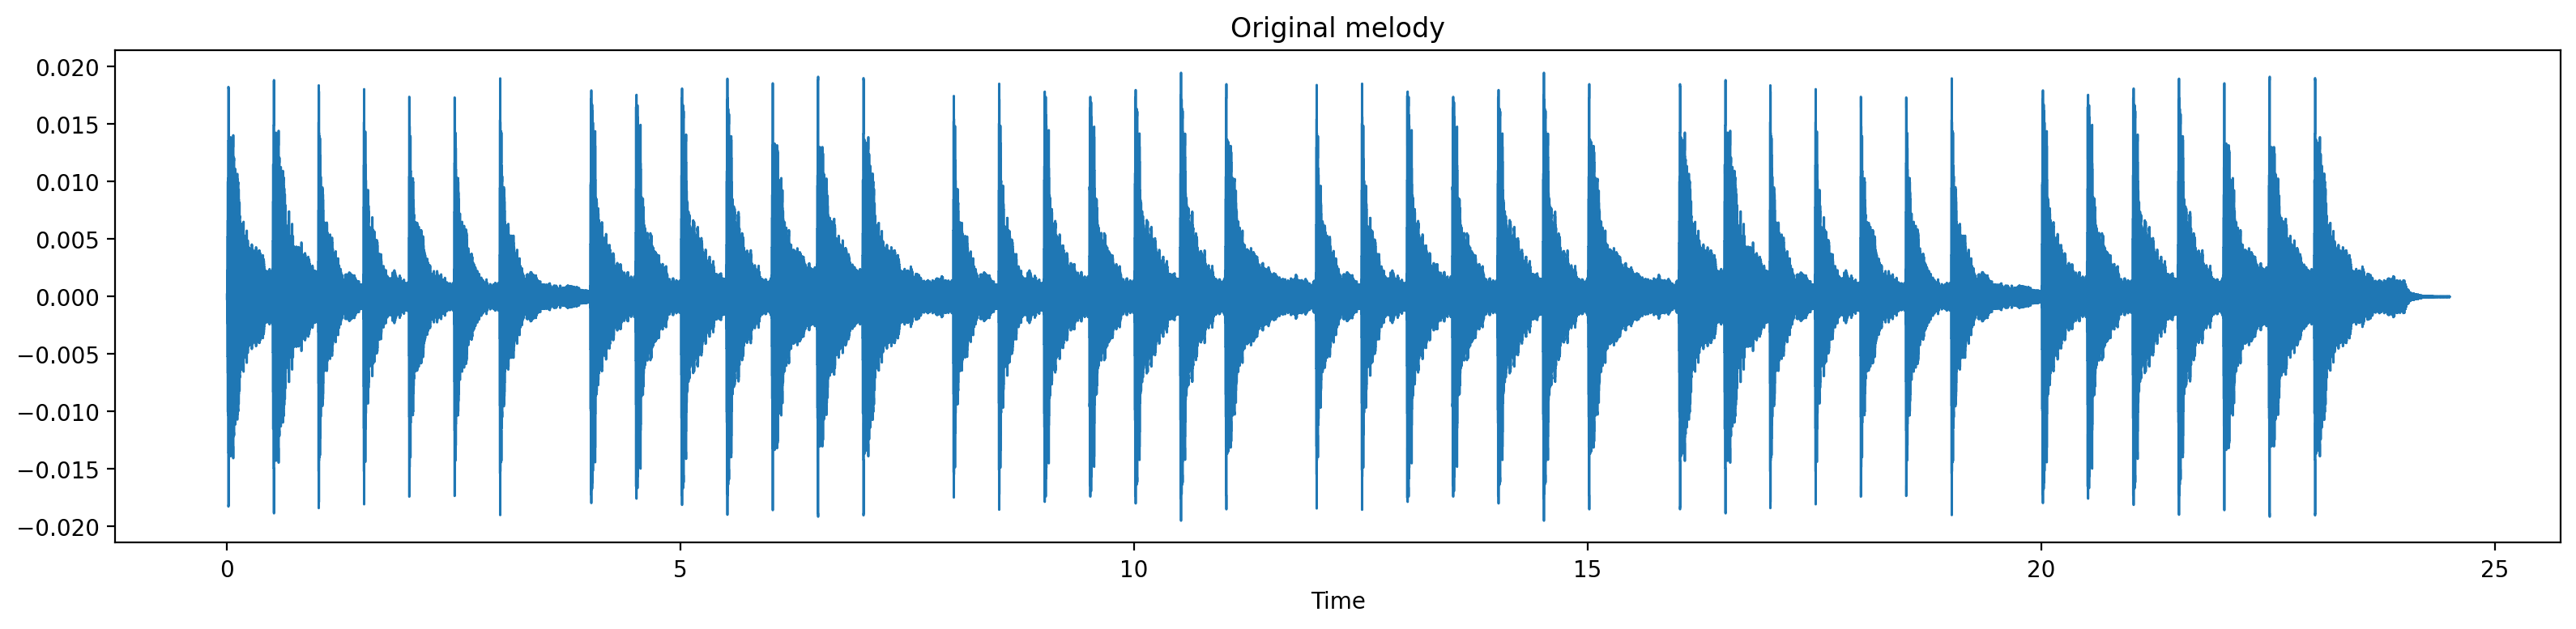

In [12]:
# Load the audio of the melody line as a waveform

Original_melody_midi = "Twinkle_melody_piano.wav"

x_org, fs_org = librosa.load(Original_melody_midi)
plt.figure(figsize=(16, 4))
librosa.display.waveshow(x_org, sr=fs_org)
plt.title('Original melody')
plt.tight_layout()

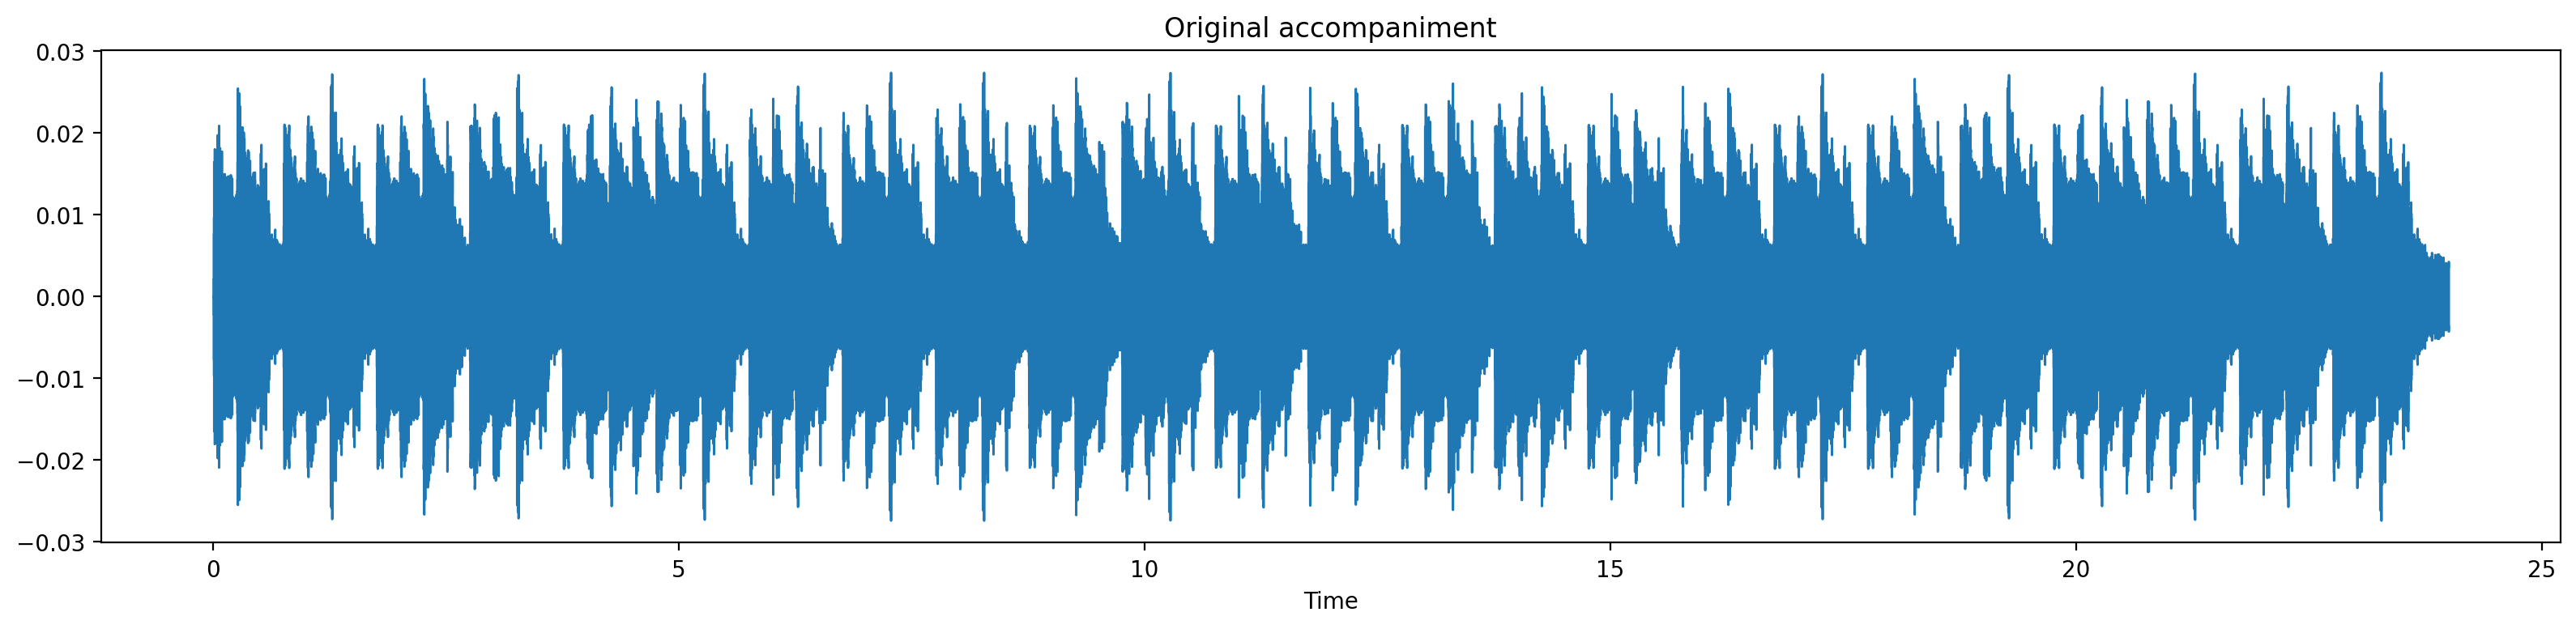

In [29]:
# Load the audio of the accompaniment line as a waveform

Original_accomp_midi = "Twinkle_piano.wav"

x_accom, fs = librosa.load(Original_accomp_midi)
plt.figure(figsize=(16, 4))
librosa.display.waveshow(x_accom, sr=fs)
plt.title('Original accompaniment')
plt.tight_layout()

In [14]:
# Load the audio of the recording as a waveform

# Set paths to the WAV files
r1_normal = "r1_normal.wav"
r2_wrongPitch = "r2_wrongPitch.wav"
r3_faster = "r3_faster.wav"
r4_wrongTempo = "r4_wrongTempo.wav"

# Load the audio recordings and sampling rates
x_rec, fs_rec = librosa.load(r1_normal)
x_rec2, fs_rec2 = librosa.load(r2_wrongPitch)
x_rec3, fs_rec3 = librosa.load(r3_faster)
x_rec4, fs_rec4 = librosa.load(r4_wrongTempo)

# Denoise
x_rec3 = x_rec3[4000:]

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

# Plot each waveform in a subplot
axs[0, 0].set(title=f'Normal Recording ({r1_normal})')
axs[0, 0].plot(x_rec)
axs[0, 1].set(title=f'Recording with Wrong Pitch ({r2_wrongPitch})')
axs[0, 1].plot(x_rec2)
axs[1, 0].set(title=f'Recording with Faster Tempo ({r3_faster})')
axs[1, 0].plot(x_rec3)
axs[1, 1].set(title=f'Recording with Wrong Tempo ({r4_wrongTempo})')
axs[1, 1].plot(x_rec4)

# Display the audio player for each recording
print('Playing audio files:')
print('-' * 20)
display(Audio(x_rec, rate=fs_rec, filename=r1_normal))
print(r1_normal)
display(Audio(x_rec2, rate=fs_rec2, filename=r2_wrongPitch))
print(r2_wrongPitch)
display(Audio(x_rec3, rate=fs_rec3, filename=r3_faster))
print(r3_faster)
display(Audio(x_rec4, rate=fs_rec4, filename=r4_wrongTempo))
print(r4_wrongTempo)

# Show the figure
plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [15]:
# Directly putting recording and accompaniment together

# if len(x_accom)> len(x_rec):
#   rec_resize= np.resize(x_rec, len(x_accom))
#   combined_direct = x_accom*3 +rec_resize
  

# else:
#   accom_resize= np.resize(x_accom, len(x_rec))
#   combined_direct = accom_resize*3+x_rec


# sf.write('direct.wav', combined_direct, fs)
# Audio('direct.wav',rate =44100)

def combine_wav(x_rec, x_accom, fs):
    # Resize the recording to match the length of the accompaniment
    if len(x_accom) > len(x_rec):
        rec_resize = np.resize(x_rec, len(x_accom))
        combined_direct = x_accom * 3 + rec_resize
    else:
        accom_resize = np.resize(x_accom, len(x_rec))
        combined_direct = accom_resize * 3 + x_rec

    # Write the combined waveform to a WAV file and play it
    sf.write('direct.wav', combined_direct, fs)
    display(Audio(combined_direct, rate=fs, filename='direct.wav'))

    return combined_direct


# Combine the audio recordings with an accompanying waveform
combine_wav(x_rec, x_accom, fs_rec)
print(r1_normal)
combine_wav(x_rec2, x_accom, fs_rec2)
print(r2_wrongPitch)
combine_wav(x_rec3, x_accom, fs_rec3)
print(r3_faster)
combine_wav(x_rec4, x_accom, fs_rec4)
print(r4_wrongTempo)




Output hidden; open in https://colab.research.google.com to view.

# Method 1 -- Dynamic Time Warping

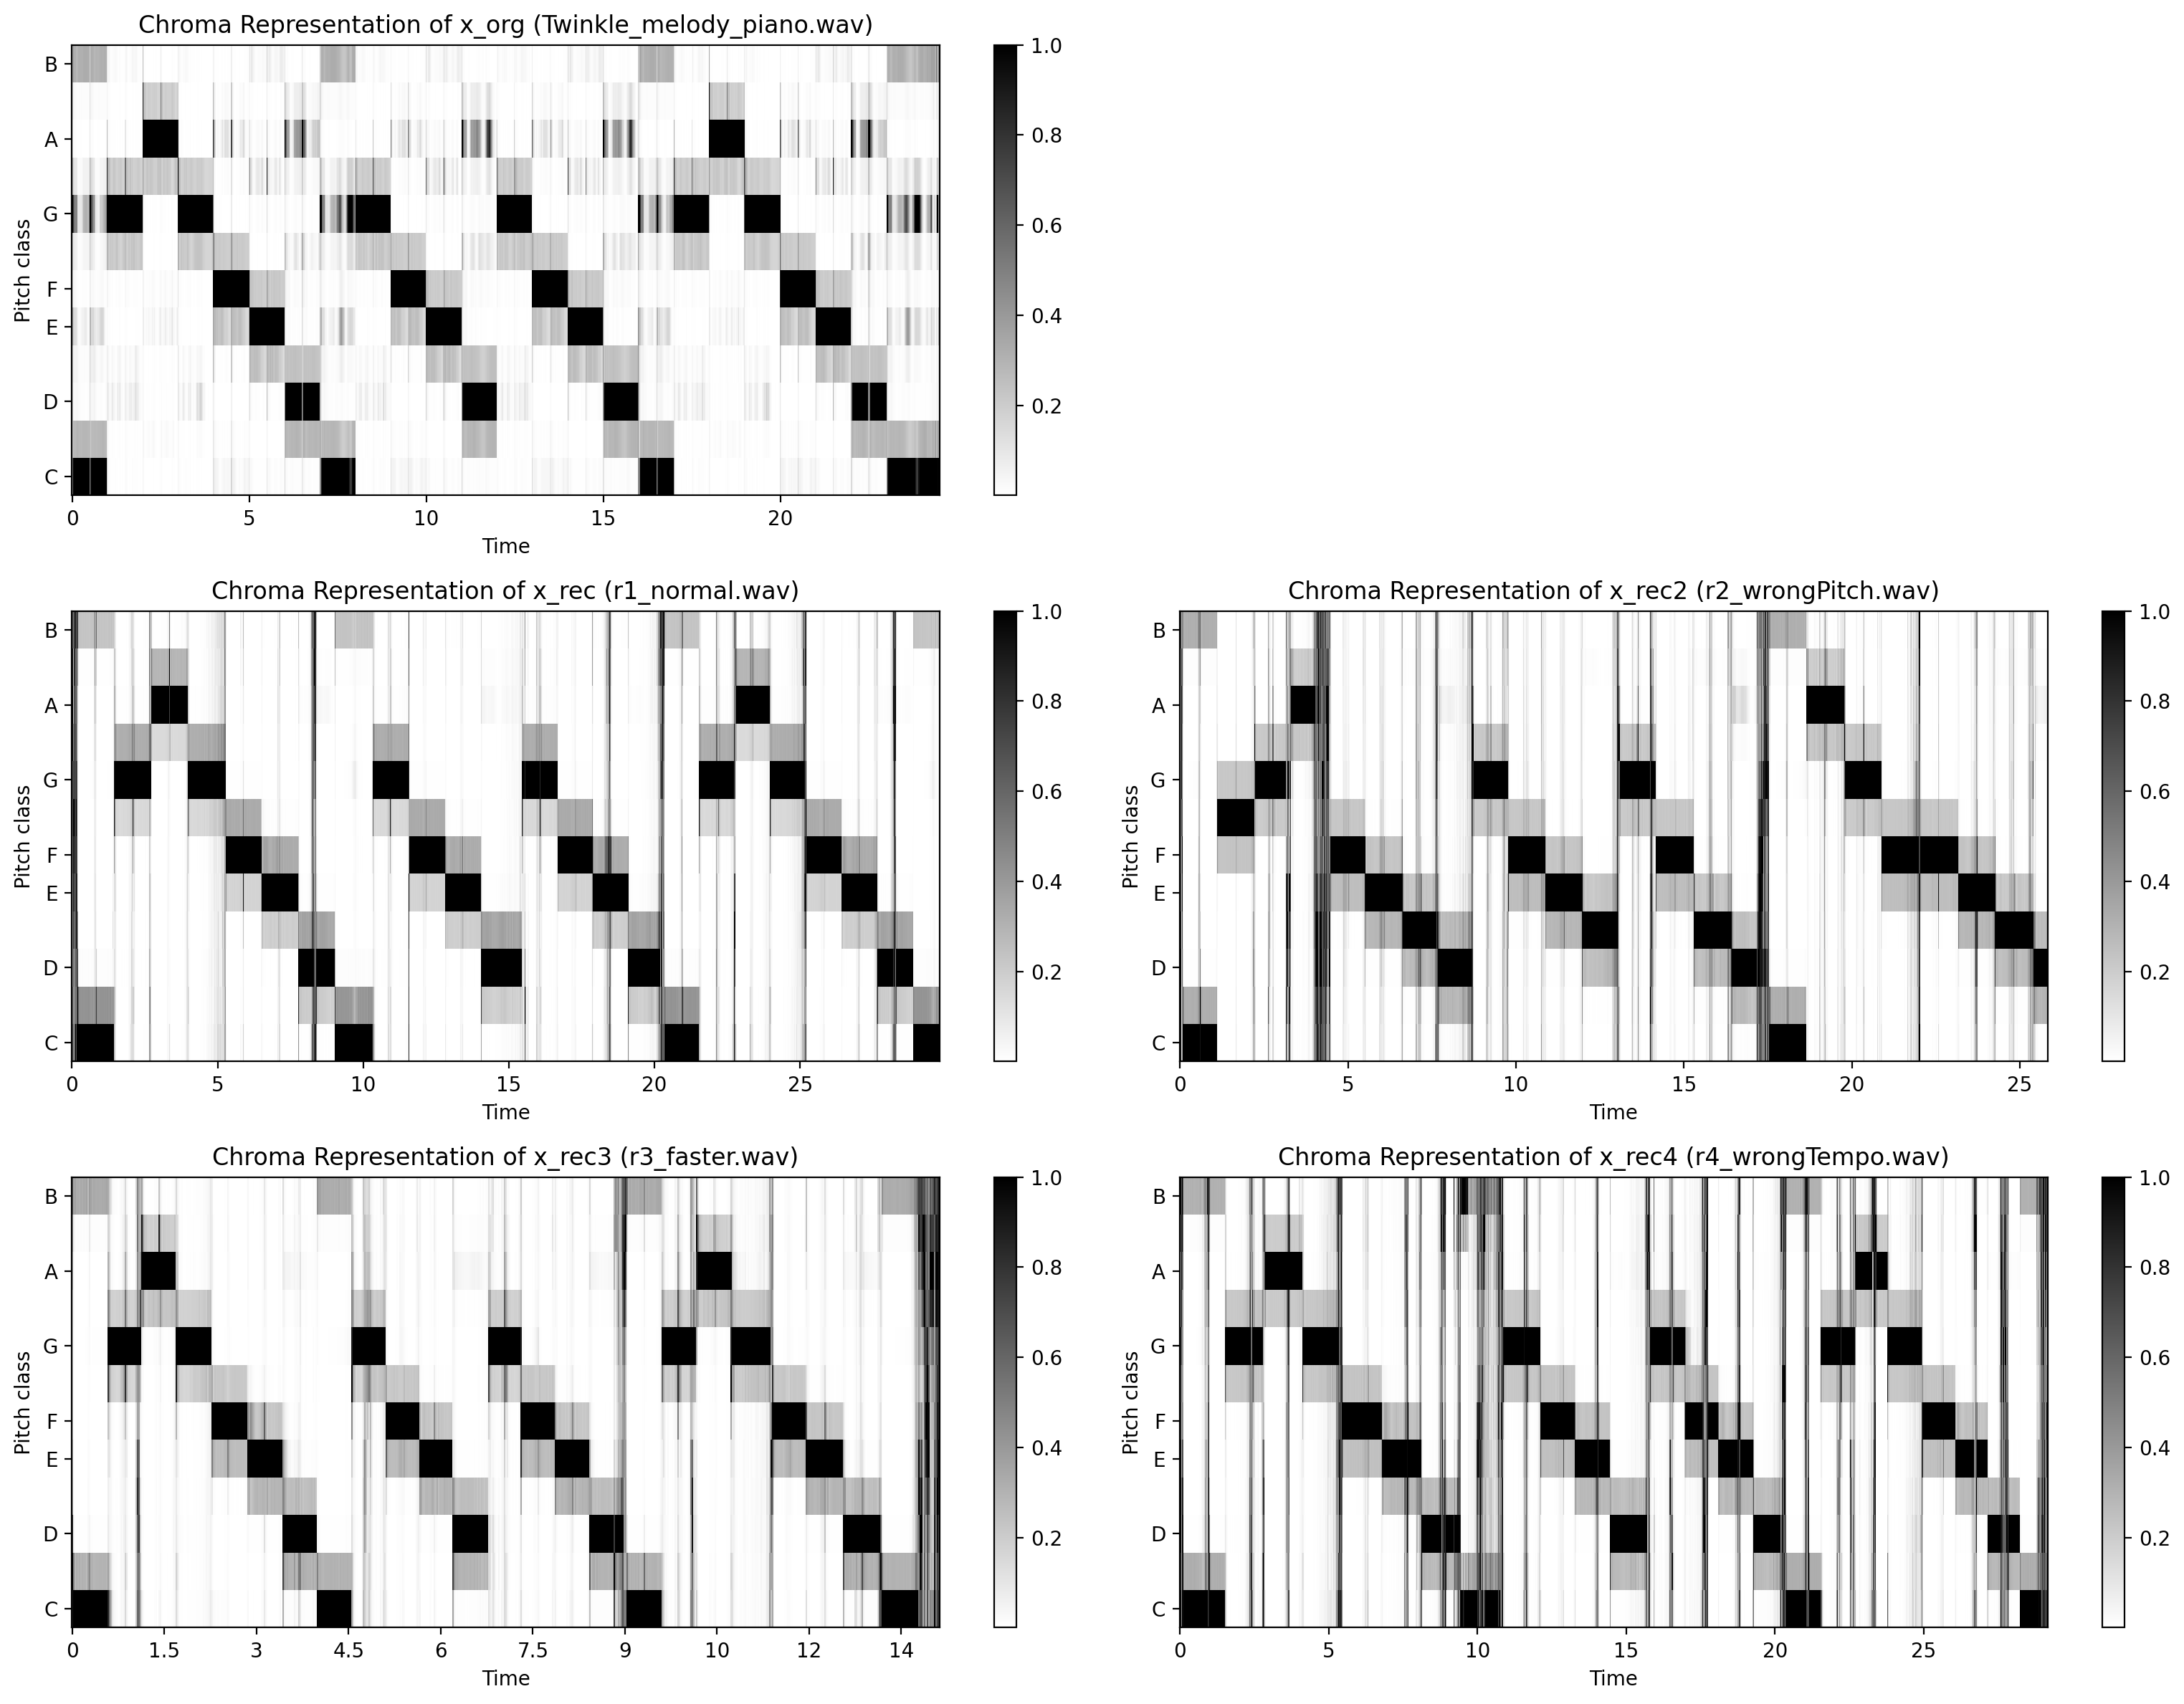

In [16]:

n_fft = 1024
hop_length = 512


# Calculate chroma representations of each recording
x_org_chroma = librosa.feature.chroma_stft(y=x_org, sr=fs_org, hop_length=hop_length, n_fft=n_fft)
x_rec_chroma = librosa.feature.chroma_stft(y=x_rec, sr=fs_rec, hop_length=hop_length, n_fft=n_fft)
x_rec2_chroma = librosa.feature.chroma_stft(y=x_rec2, sr=fs_rec2, hop_length=hop_length, n_fft=n_fft)
x_rec3_chroma = librosa.feature.chroma_stft(y=x_rec3, sr=fs_rec3, hop_length=hop_length, n_fft=n_fft)
x_rec4_chroma = librosa.feature.chroma_stft(y=x_rec4, sr=fs_rec4, hop_length=hop_length, n_fft=n_fft)

# Plot the chroma representations in a 3x2 grid
plt.figure(figsize=(16, 12))

plt.subplot(3, 2, 1)
plt.title(f'Chroma Representation of x_org ({Original_melody_midi})')
librosa.display.specshow(x_org_chroma, x_axis='time', y_axis='chroma', cmap='gray_r', hop_length=hop_length)
plt.colorbar()

plt.subplot(3, 2, 3)
plt.title(f'Chroma Representation of x_rec ({r1_normal})')
librosa.display.specshow(x_rec_chroma, x_axis='time', y_axis='chroma', cmap='gray_r', hop_length=hop_length)
plt.colorbar()

plt.subplot(3, 2, 4)
plt.title(f'Chroma Representation of x_rec2 ({r2_wrongPitch})')
librosa.display.specshow(x_rec2_chroma, x_axis='time', y_axis='chroma', cmap='gray_r', hop_length=hop_length)
plt.colorbar()

plt.subplot(3, 2, 5)
plt.title(f'Chroma Representation of x_rec3 ({r3_faster})')
librosa.display.specshow(x_rec3_chroma, x_axis='time', y_axis='chroma', cmap='gray_r', hop_length=hop_length)
plt.colorbar()

plt.subplot(3, 2, 6)
plt.title(f'Chroma Representation of x_rec4 ({r4_wrongTempo})')
librosa.display.specshow(x_rec4_chroma, x_axis='time', y_axis='chroma', cmap='gray_r', hop_length=hop_length)
plt.colorbar()

plt.tight_layout()
plt.show()


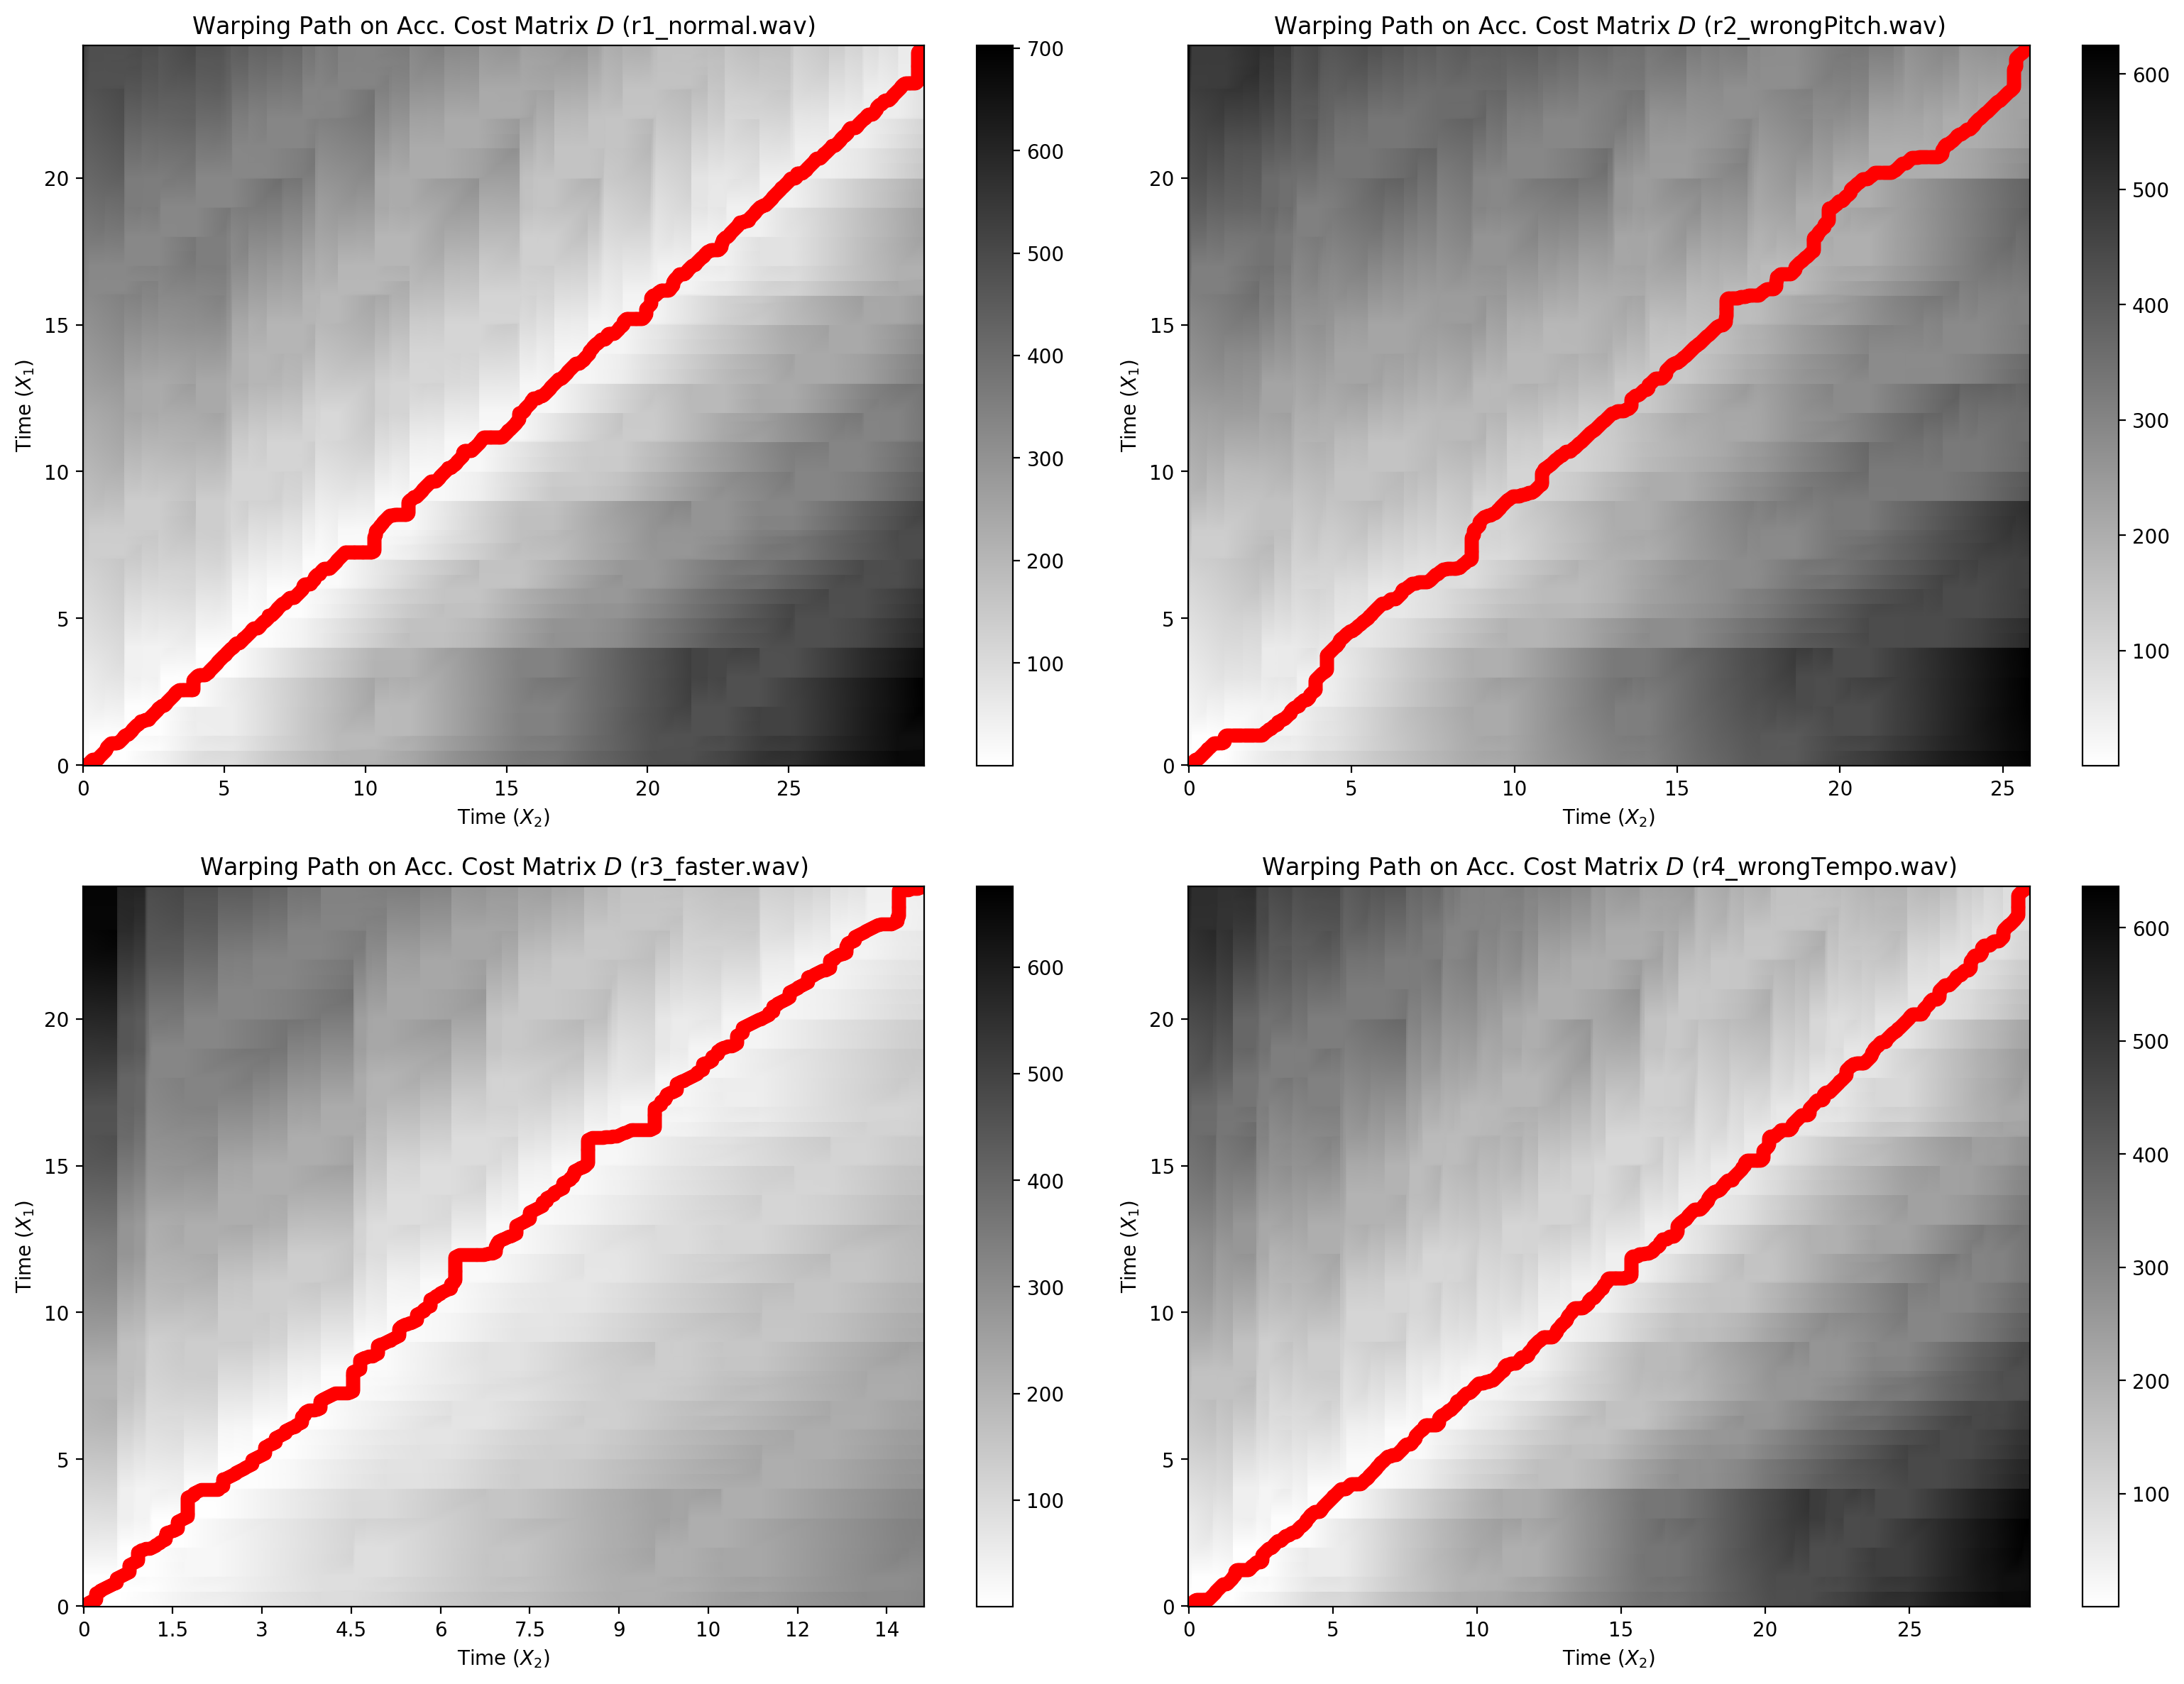

In [17]:
# Plot the chroma representations and warping paths for each recording
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

for i, (chroma, title, recording) in enumerate(zip([x_rec_chroma, x_rec2_chroma, x_rec3_chroma, x_rec4_chroma],
                                                    [r1_normal, r2_wrongPitch, r3_faster, r4_wrongTempo],
                                                    [x_rec, x_rec2, x_rec3, x_rec4])):
    # Calculate the DTW and warping path
    D, wp = librosa.sequence.dtw(X=x_org_chroma, Y=chroma, metric='cosine')
    wp_s = librosa.frames_to_time(wp, sr=fs, hop_length=hop_length)

    # Plot the chroma representation and warping path
    row = i // 2
    col = i % 2

    img = librosa.display.specshow(D, x_axis='time', y_axis='time', sr=fs,
                                   cmap='gray_r', hop_length=hop_length, ax=axs[row, col])

    axs[row, col].plot(wp_s[:, 1], wp_s[:, 0], marker='o', color='r')
    axs[row, col].set(title=f'Warping Path on Acc. Cost Matrix $D$ ({title})',
                      xlabel='Time $(X_2)$', ylabel='Time $(X_1)$')
    fig.colorbar(img, ax=axs[row, col])

# Display the plot
plt.tight_layout()
plt.show()



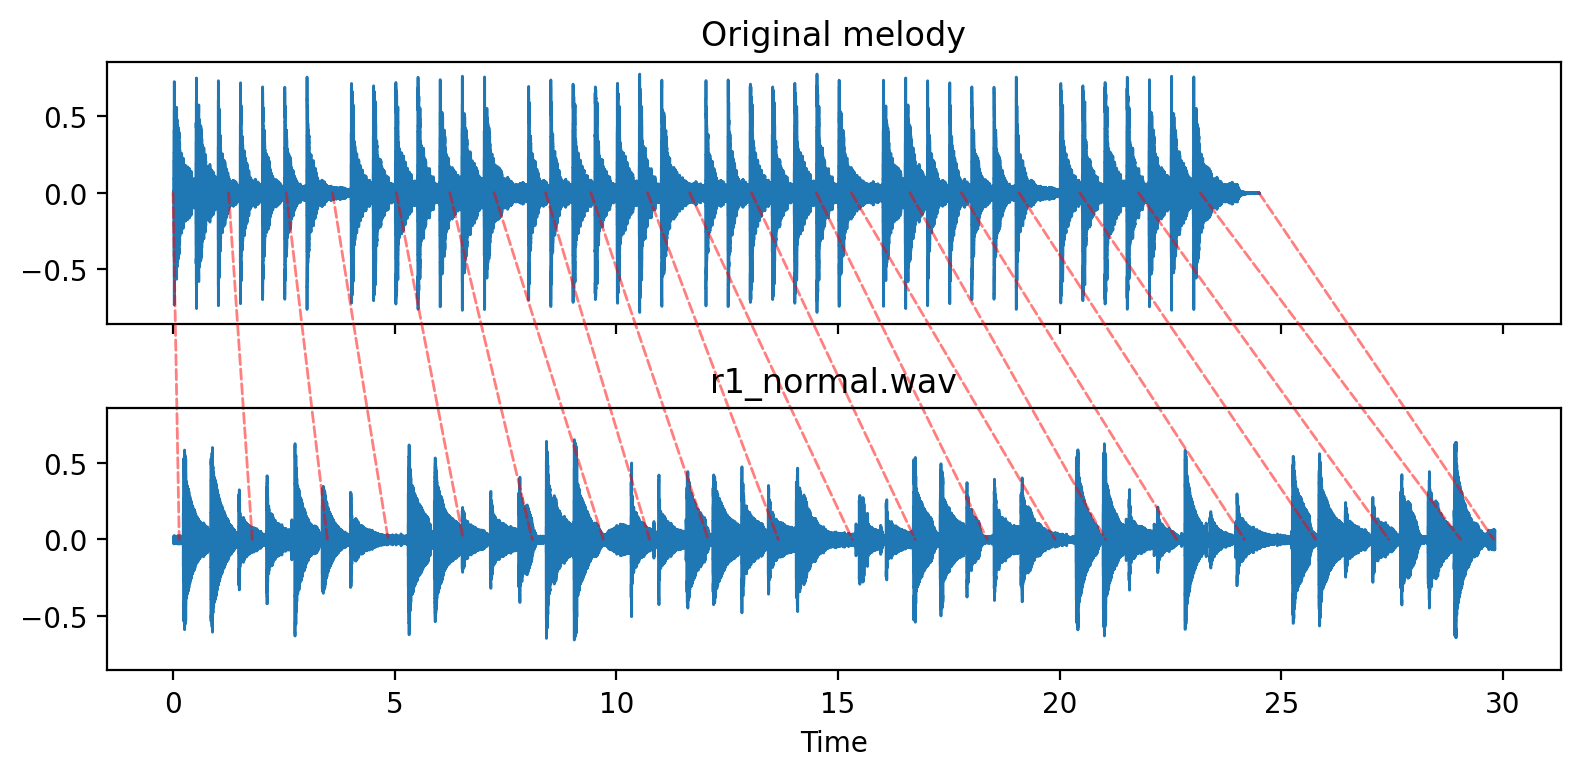

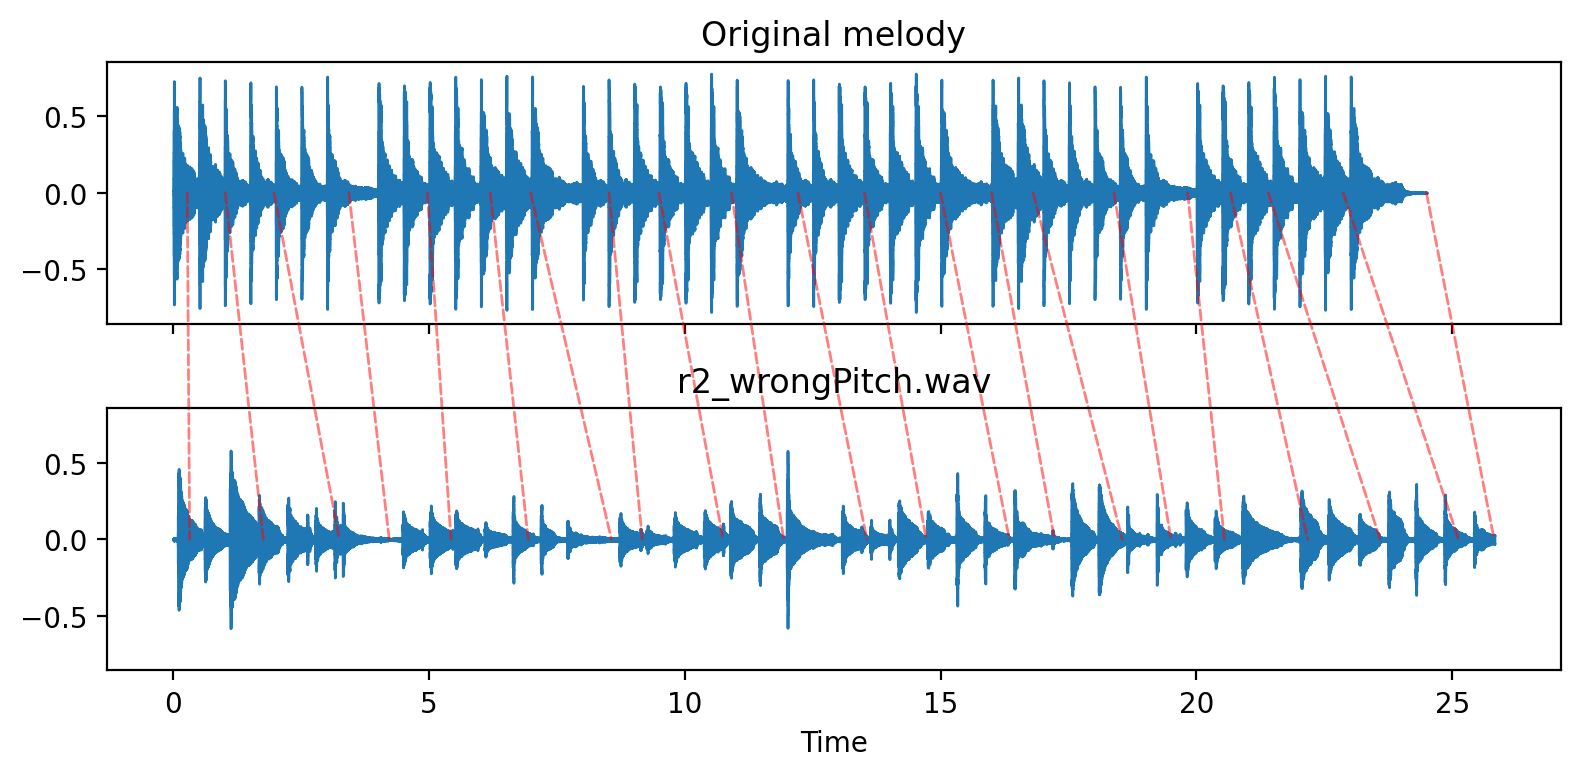

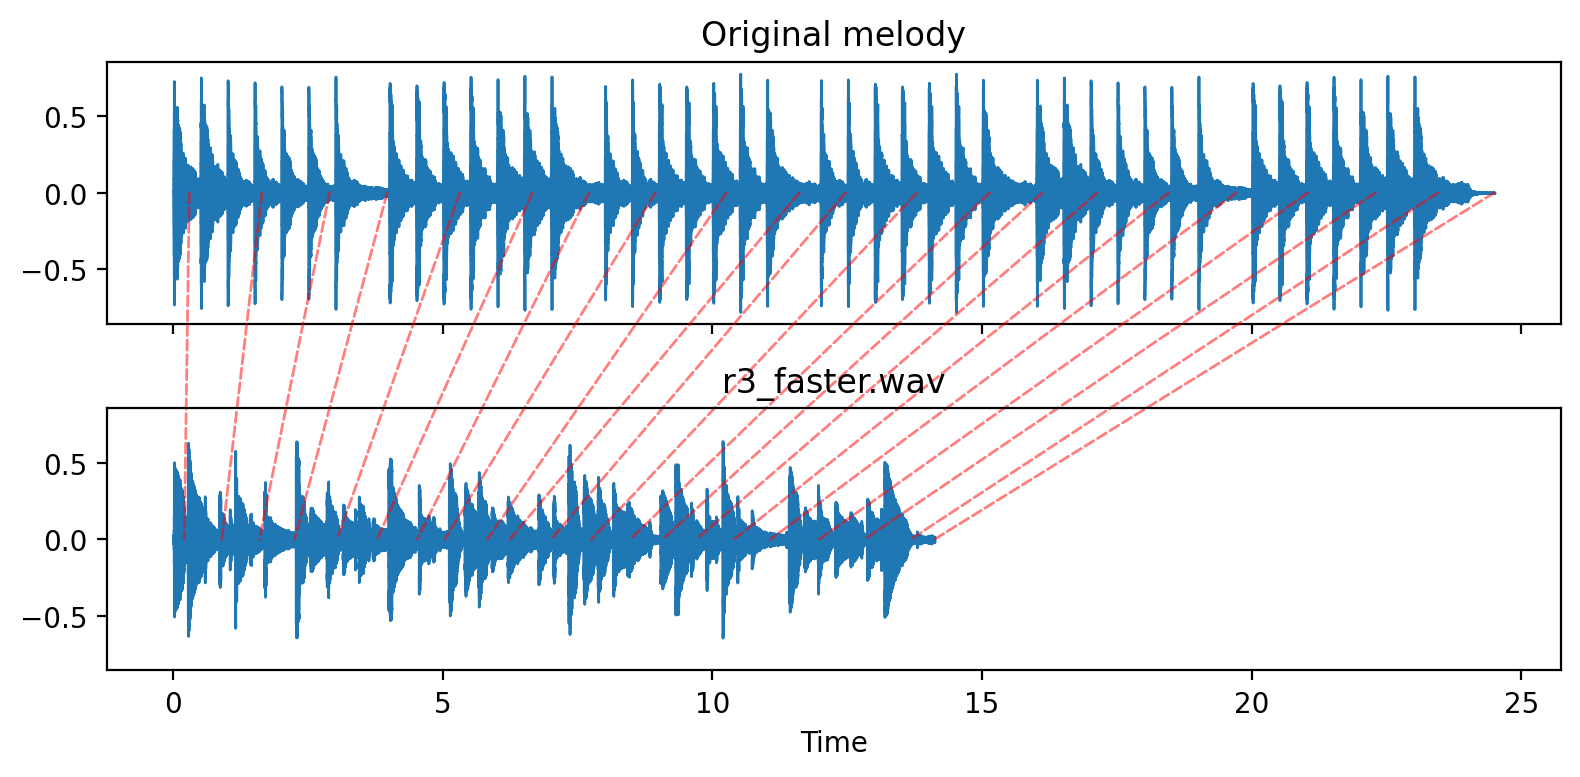

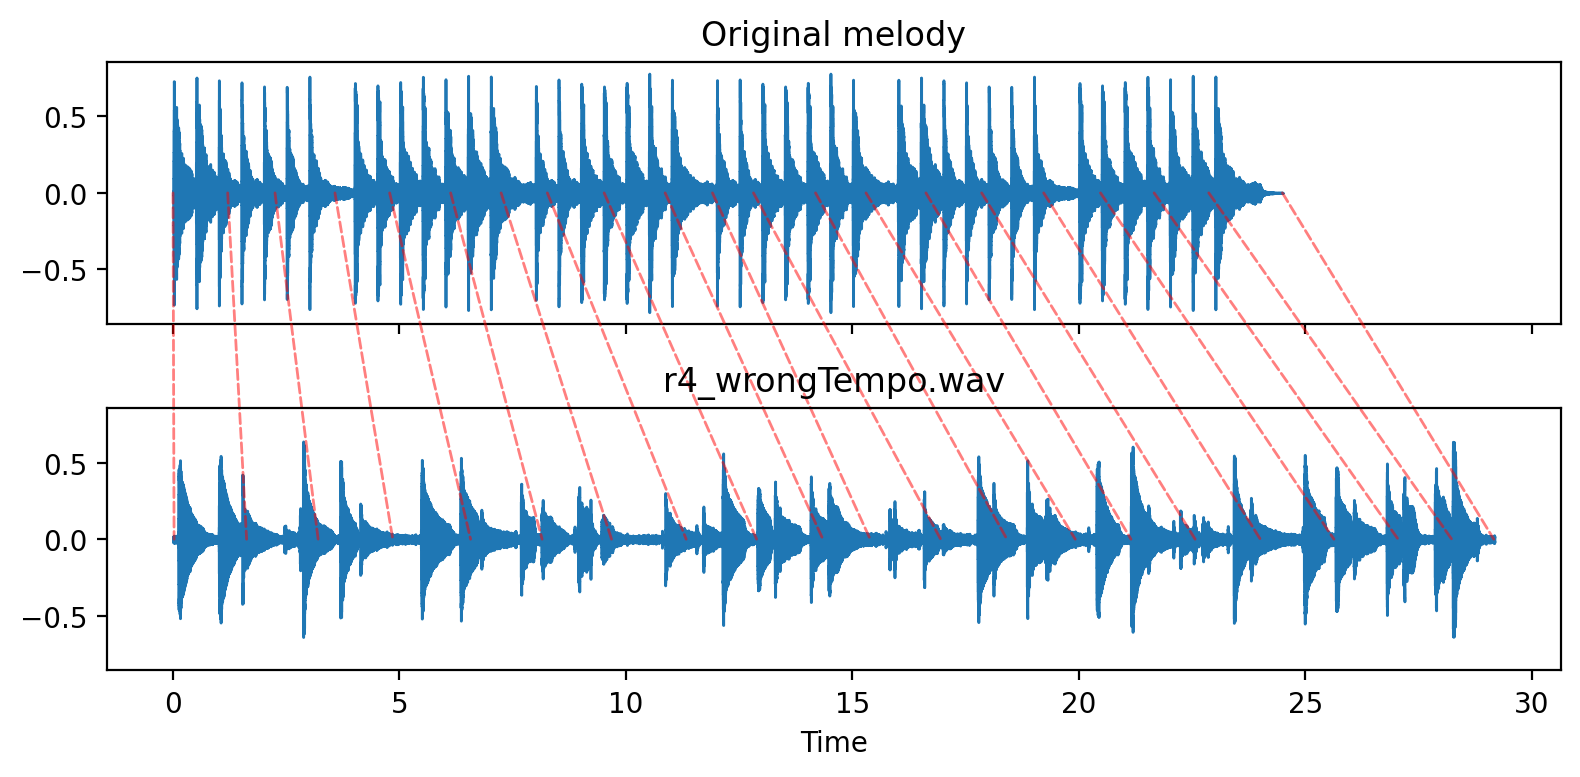

In [18]:
# Plot the waveforms and connections for each recording
from matplotlib.patches import ConnectionPatch


# Plot the aligned audio waveforms with warping path for all audio tracks
for i, (chroma, title, recording) in enumerate(zip([x_rec_chroma, x_rec2_chroma, x_rec3_chroma, x_rec4_chroma],
                                                    [r1_normal, r2_wrongPitch, r3_faster, r4_wrongTempo],
                                                    [x_rec, x_rec2, x_rec3, x_rec4])):
    # Calculate the DTW and warping path
    D, wp = librosa.sequence.dtw(X=x_org_chroma, Y=chroma, metric='cosine')
    wp_s = librosa.frames_to_time(wp, sr=fs, hop_length=hop_length)

    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(8,4))

    # Plot x_2
    librosa.display.waveshow(recording, sr=fs, ax=ax2)
    ax2.set(title=title)

    # Plot x_1
    librosa.display.waveshow(x_org*40, sr=fs_org, ax=ax1)
    ax1.set(title='Original melody')
    ax1.label_outer()

    n_arrows = 20
    for tp1, tp2 in wp_s[::len(wp_s)//n_arrows]:
        # Create a connection patch between the aligned time points
        # in each subplot
        con = ConnectionPatch(xyA=(tp1, 0), xyB=(tp2, 0),
                              axesA=ax1, axesB=ax2,
                              coordsA='data', coordsB='data',
                              color='r', linestyle='--',
                              alpha=0.5)
        con.set_in_layout(False)  # This is needed to preserve layout
        ax2.add_artist(con)
        
    plt.tight_layout()
    plt.show()




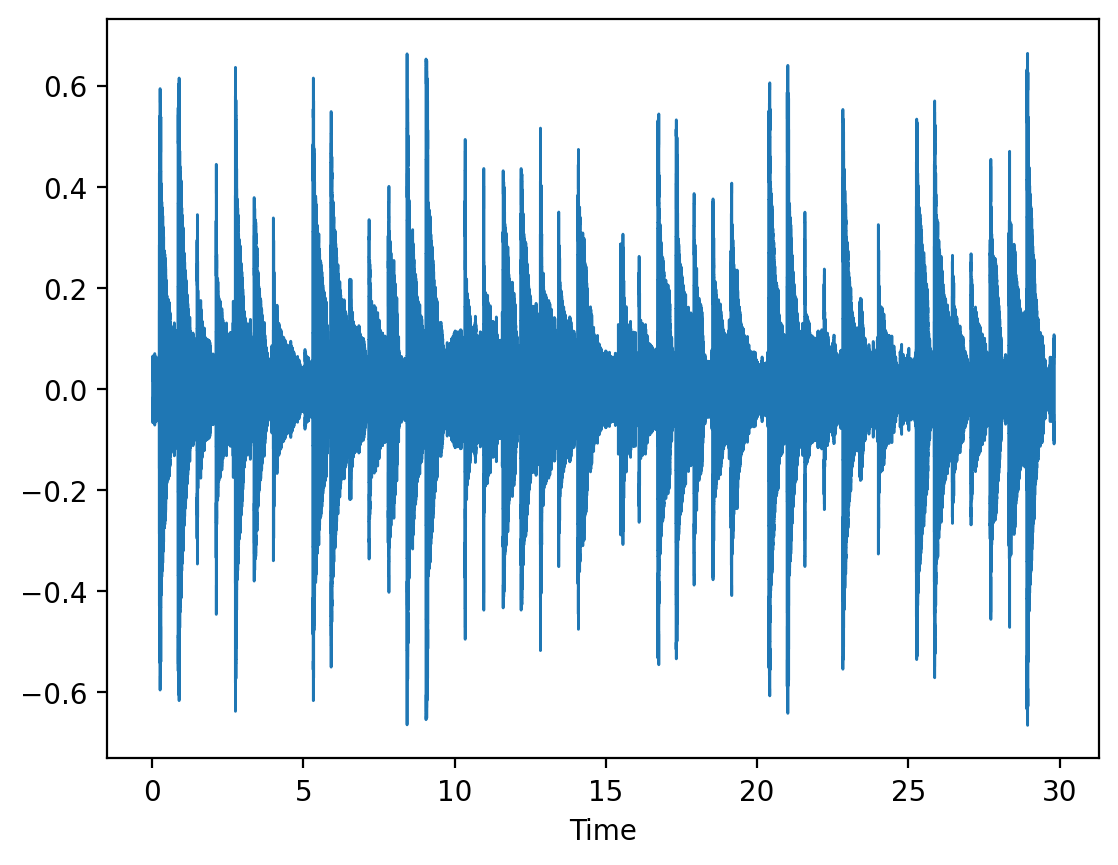

In [19]:
import soundfile as sf

# Compute the aligned versions of the two audio waveforms
aligned_y1 = np.zeros_like(x_rec)
accom_resize= np.resize(x_accom, len(x_rec))

# Iterate through the DTW path and copy audio samples to the aligned waveforms
prev=-1
ct=0

for i, j in wp:
  for p in range(hop_length):
      aligned_y1[(j-1)*hop_length + p] = accom_resize[(i-1)*hop_length + p]*3

aligned_y1 += x_rec

librosa.display.waveshow(aligned_y1, sr=fs_rec)


# Save the aligned audio waveforms to files (optional)
sf.write('aligned_audio.wav', aligned_y1, fs_rec)
Audio('aligned_audio.wav',rate =fs_rec)

In [20]:
import soundfile as sf


# Create a 2 by 2 subplot grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Iterate through each recording file
for i, (title, recording, fs_recording) in enumerate(zip([r1_normal, r2_wrongPitch, r3_faster, r4_wrongTempo],
                                                    [x_rec, x_rec2, x_rec3, x_rec4],
                                                    [fs_rec, fs_rec2, fs_rec3, fs_rec4])):
    
    x_rec_chroma = librosa.feature.chroma_stft(y=recording, sr=fs_recording, hop_length=hop_length, n_fft=n_fft)

    # Calculate the DTW and warping path
    D, wp = librosa.sequence.dtw(X=x_org_chroma, Y=x_rec_chroma, metric='cosine')

    # Compute the aligned versions of the original accompaniment and recording waveforms
    aligned_waveform = np.zeros_like(recording)

    # Resize the original accompaniment waveform to match the length of the recording waveform
    accom_resize = np.resize(x_accom, len(x_org))

    # Iterate through the DTW path and copy audio samples to the aligned waveform
    for j, k in wp:
        for p in range(hop_length):
            aligned_waveform[(k-1)*hop_length + p] = accom_resize[(j-1)*hop_length + p] * 3

    # Combine the aligned waveform with the recording waveform
    aligned_waveform = aligned_waveform + recording

    # Plot the combined waveform
    plt.subplot(2, 2, i+1)
    librosa.display.waveshow(aligned_waveform, sr=fs_recording)
    plt.title(f'Combined Audio ({title})')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    # Save the combined audio waveform to a file (optional)
    combined_file = f'DTW_result_{title}'
    sf.write(combined_file, aligned_waveform, fs_recording)

    # Play the combined audio
    print(f'Combining result of {title} by DTW: ')
    display(Audio(combined_file, rate=fs_recording))


# Display the plot
plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

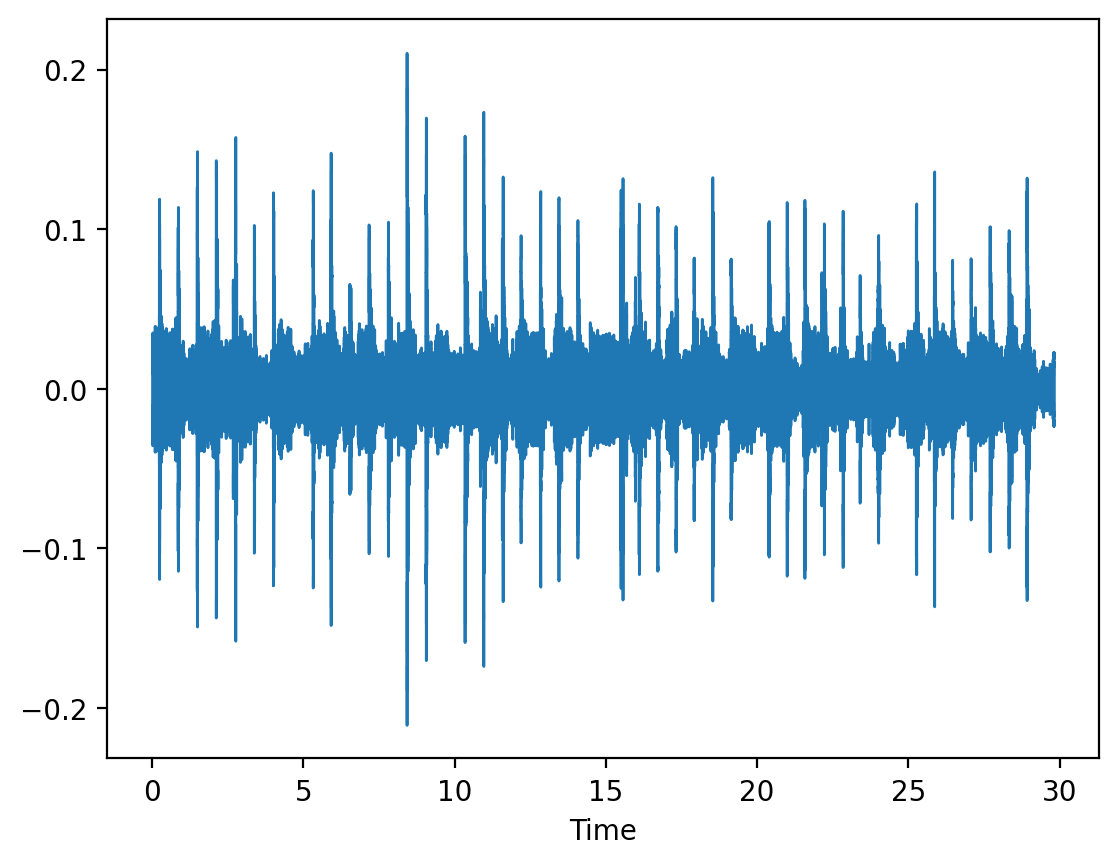

In [21]:
from scipy.signal import butter, filtfilt

# Define the filter parameters
cutoff_freq = 700  # Hz
nyquist_freq = 0.95 * fs  # Hz
b, a = butter(N=6, Wn=cutoff_freq / nyquist_freq, btype='lowpass')

# Apply the filter to the aligned waveform
smoothed_y1 = filtfilt(b, a, aligned_y1)

librosa.display.waveshow(smoothed_y1, sr=fs_rec)

combined = smoothed_y1*8+x_rec/2
# Save the aligned audio waveforms to files (optional)
sf.write('aligned_audio.wav',combined , fs_rec)
Audio('aligned_audio.wav',rate =fs_rec)

In [22]:
from scipy.signal import butter, filtfilt

# Create a 2 by 2 subplot grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Iterate through each recording file
for i, (title, recording, fs_recording) in enumerate(zip([r1_normal, r2_wrongPitch, r3_faster, r4_wrongTempo],
                                                    [x_rec, x_rec2, x_rec3, x_rec4],
                                                    [fs_rec, fs_rec2, fs_rec3, fs_rec4])):
  
    # Define the filter parameters
    cutoff_freq = 700  # Hz
    nyquist_freq = 0.95 * fs_recording  # Hz
    b, a = butter(N=6, Wn=cutoff_freq / nyquist_freq, btype='lowpass')
    
    x_rec_chroma = librosa.feature.chroma_stft(y=recording, sr=fs_recording, hop_length=hop_length, n_fft=n_fft)

    # Calculate the DTW and warping path
    D, wp = librosa.sequence.dtw(X=x_org_chroma, Y=x_rec_chroma, metric='cosine')

    # Compute the aligned versions of the original accompaniment and recording waveforms
    aligned_waveform = np.zeros_like(recording)

    # Resize the original accompaniment waveform to match the length of the recording waveform
    accom_resize = np.resize(x_accom, len(x_org))

    # Iterate through the DTW path and copy audio samples to the aligned waveform
    for j, k in wp:
        for p in range(hop_length):
            aligned_waveform[(k-1)*hop_length + p] = accom_resize[(j-1)*hop_length + p] * 3

    # Apply the filter to the aligned waveform
    smoothed_y1 = filtfilt(b, a, aligned_waveform) 
    # Plot the combined waveform
    plt.subplot(2, 2, i+1)
    librosa.display.waveshow(smoothed_y1, sr=fs_recording)
    plt.title(f'Combined Audio using butter ({title})')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    # Save the combined audio waveform to a file (optional)
    combined = smoothed_y1*4+recording
    combined_file = f'DTW_butter_{title}'
    sf.write(combined_file, combined, fs_recording)

    # Play the combined audio
    print(f'Combining result of {title} by DTW using butter: ')
    display(Audio(combined_file, rate=fs_recording))


# Display the plot
plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

# Method 2 -- Onset Detection

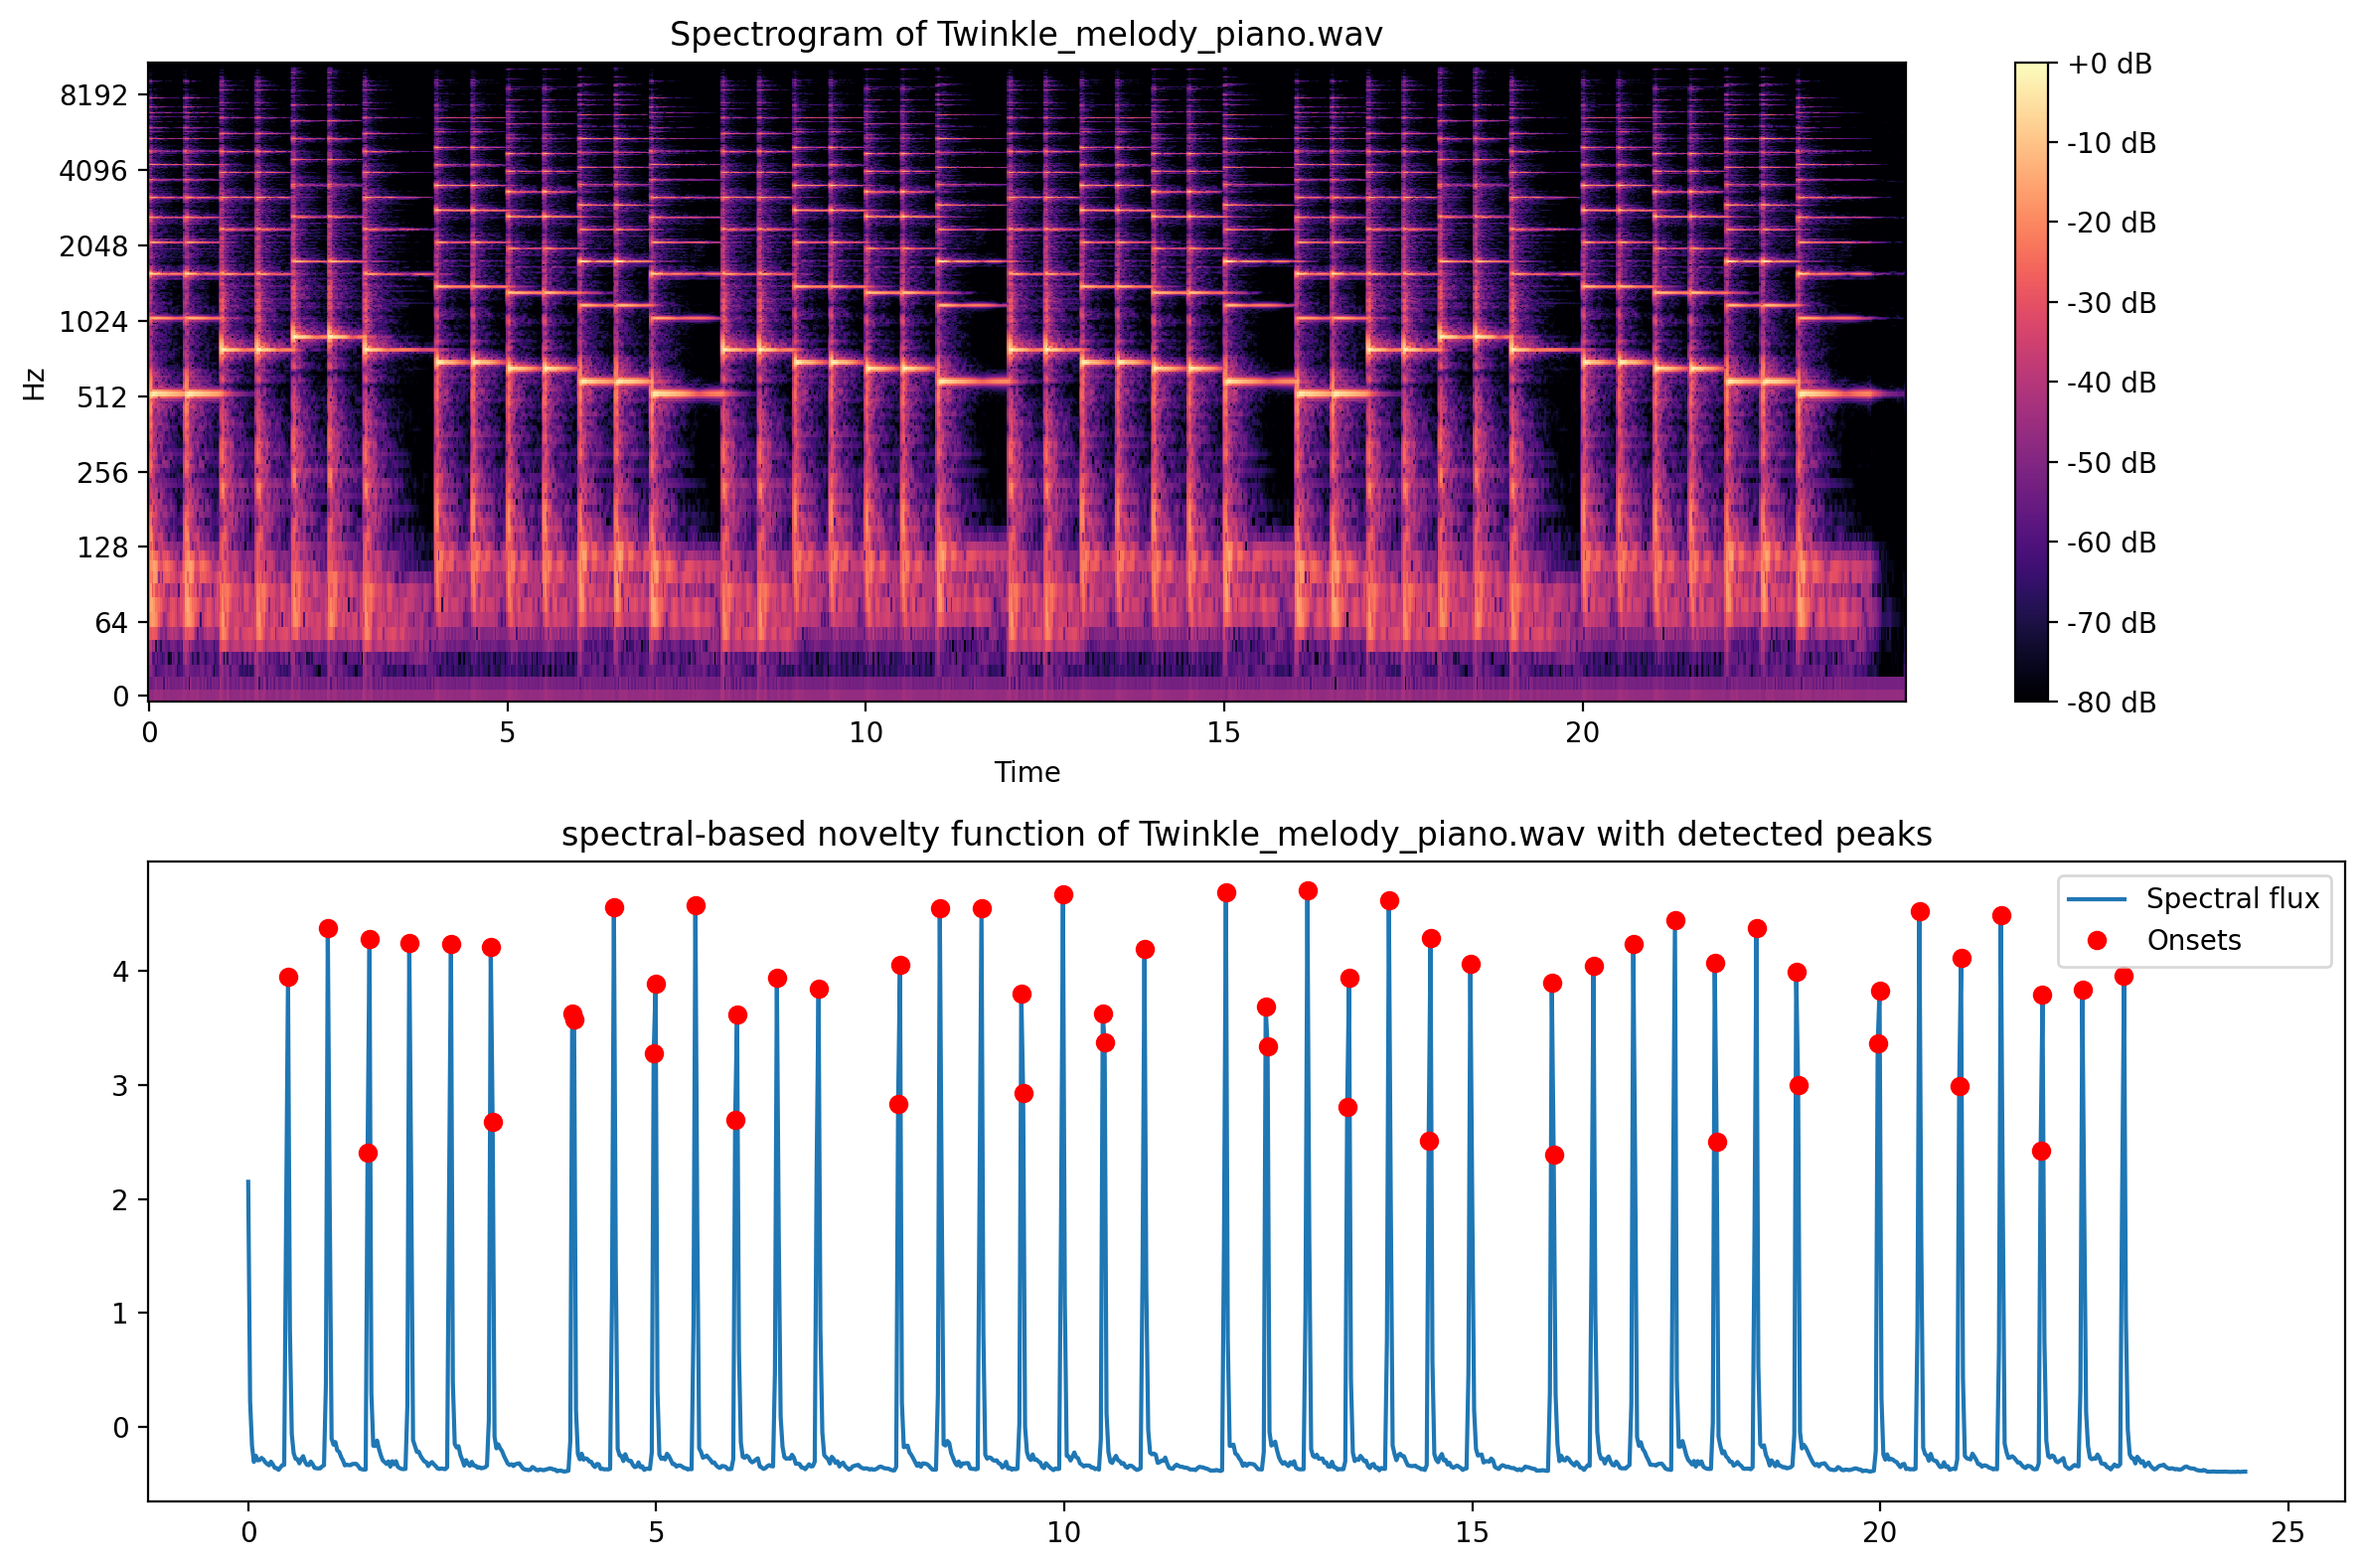

In [23]:
#For Twinkle Recording


def plot_onsets(filename, audio, sr, plotsize = (9, 6)):
    # Calculate spectral flux
    hop_length = 512
    spec = np.abs(librosa.stft(audio, hop_length=hop_length))
    spec_diff = np.diff(spec, axis=1)
    spec_diff[spec_diff < 0] = 0
    spec_flux = np.sum(spec_diff, axis=0)

    # Normalize spectral flux
    spec_flux -= np.mean(spec_flux)
    spec_flux /= np.std(spec_flux)

    # Set onset threshold
    onset_threshold = np.max(spec_flux) * 0.5

    # Find onsets
    onset_frames = np.where(spec_flux > onset_threshold)[0]
    onset_times = librosa.frames_to_time(onset_frames, sr=sr, hop_length=hop_length)

    # Plot spectrogram and onsets
    plt.figure(figsize=plotsize)
    plt.rcParams.update({'font.size': 10})
    plt.subplot(211)
    librosa.display.specshow(librosa.amplitude_to_db(spec, ref=np.max),
                             sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram of {filename}')
    plt.subplot(212)
    plt.plot(librosa.times_like(spec_flux, sr=sr, hop_length=hop_length), spec_flux, label='Spectral flux')
    plt.plot(onset_times, spec_flux[onset_frames], 'ro', label='Onsets')
    plt.title(f'spectral-based novelty function of {filename} with detected peaks')
    plt.axis('tight')
    plt.legend(frameon=True, framealpha=0.75)
    plt.tight_layout()
    plt.show()

#For Twinkle melody

plot_onsets(Original_melody_midi, x_org, fs_org, plotsize = (12, 8))


In [24]:
plot_onsets(r1_normal, x_rec, fs_rec)
plot_onsets(r2_wrongPitch, x_rec2, fs_rec2)
plot_onsets(r3_faster, x_rec3, fs_rec3)
plot_onsets(r4_wrongTempo, x_rec4, fs_rec4)


Output hidden; open in https://colab.research.google.com to view.

# Method 3 -- Tempo detection

<ipython-input-25-e29cc5172c28>:9: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(60/t, r)


(0.0, 648.4253777178471)

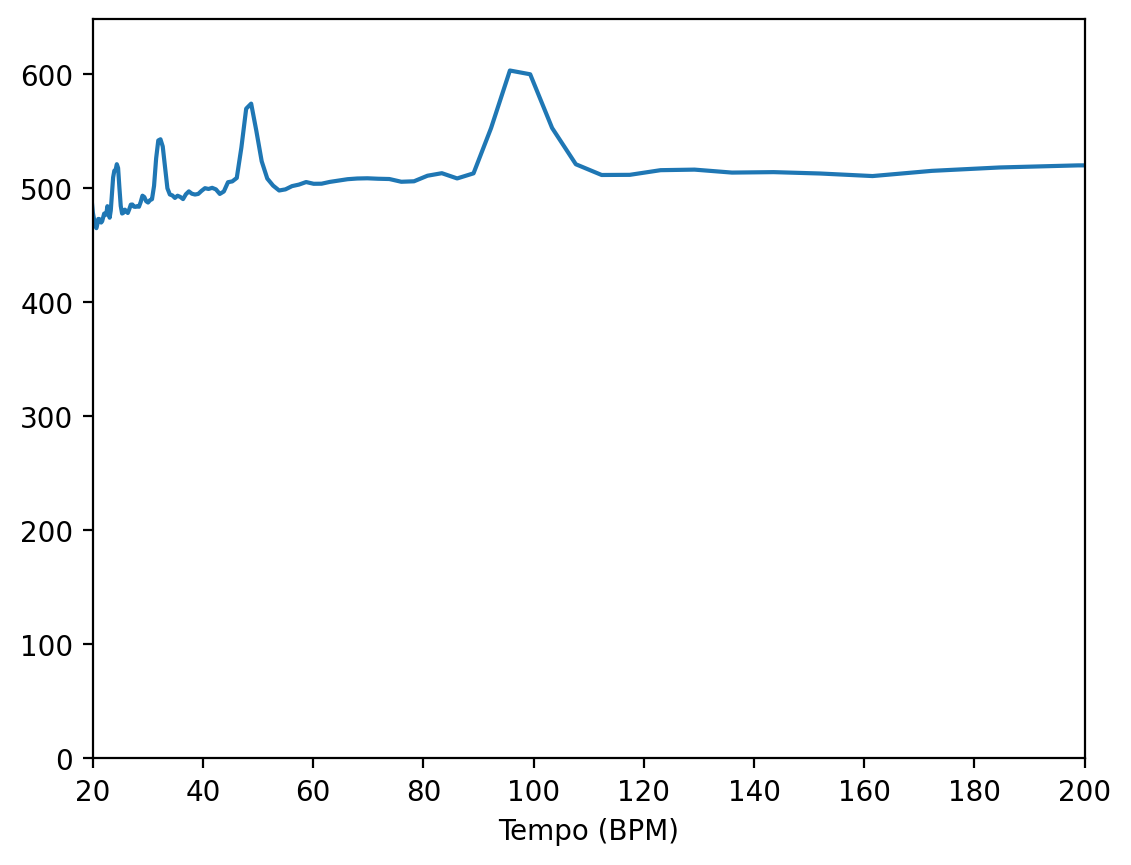

In [25]:
onset_env = librosa.onset.onset_strength(y=x_rec, sr=fs_rec)
hop_length = 512
frames = range(len(onset_env))
t = librosa.frames_to_time(frames, sr=fs, hop_length=hop_length)
tmp = np.log1p(onset_env)

r = librosa.autocorrelate(tmp)

plt.plot(60/t, r)
plt.xlim(20, 200)
plt.xlabel('Tempo (BPM)')
plt.ylim(0)



In [26]:
# Create a 2 by 2 subplot grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 9))

for i, (title, recording, fs_recording) in enumerate(zip([r1_normal, r2_wrongPitch, r3_faster, r4_wrongTempo],
                                                    [x_rec, x_rec2, x_rec3, x_rec4],
                                                    [fs_rec, fs_rec2, fs_rec3, fs_rec4])):
    tempogram_rec = librosa.feature.tempogram(y=recording, sr=fs_recording, hop_length=512)
    tempogram_accom = librosa.feature.tempogram(y=x_accom, sr=fs, hop_length=512)

    # Compute the cross-correlation matrix between the two tempograms
    corr = np.abs(np.correlate(tempogram_accom[0], tempogram_rec[0], mode='full'))
    max_index = np.argmax(np.abs(corr))

    # Compute the time shift in seconds
    shift = librosa.frames_to_time(max_index, sr=fs, hop_length=hop_length)

    # Compute the time axis of the original tempogram
    tempogram_accom_time = librosa.times_like(tempogram_accom, sr=fs, hop_length=hop_length)

    # Shift the original tempogram using linear interpolation
    tempogram_accom_shifted = np.interp(tempogram_accom_time - shift, tempogram_accom_time, tempogram_accom[0])

    # Extract the beat times from the shifted tempogram
    beat_times_accom_shifted = librosa.frames_to_time(librosa.util.fix_frames(librosa.beat.beat_track(y=None, sr=fs, onset_envelope=tempogram_accom_shifted, hop_length=hop_length, start_bpm=120)[1]), sr=fs, hop_length=hop_length)

    beat_times_rec = librosa.frames_to_time(librosa.util.fix_frames(librosa.beat.beat_track(y=recording, sr=fs_recording)[1]), sr=fs_recording)

    # Resample the reference beat times to match the original tempo
    beat_times_rec_resampled = librosa.resample(beat_times_rec, orig_sr=fs_recording, target_sr=fs, res_type='kaiser_fast')

    # Generate the aligned audio using the shifted beat times
    x_aligned = librosa.effects.time_stretch(y = x_accom, rate = librosa.get_duration(y=x_accom,sr=fs) / librosa.get_duration(y=recording,sr=fs_recording))

    combined = x_aligned*4+recording

    plt.subplot(2, 2, i+1)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(f'Before and After waveform of accompaniment({title})')
    librosa.display.waveshow(x_accom, sr=fs)
    librosa.display.waveshow(x_aligned, sr=fs_recording)

    # Save the aligned audio waveforms to files (optional)
    sf.write('aligned_audio_tempo.wav', combined, fs_recording)
    Audio('aligned_audio_tempo.wav',rate =44100)

    print(f'Combining result of {title} by tempo detection: ')
    display(Audio(combined, rate=fs_recording))


Output hidden; open in https://colab.research.google.com to view.


# Method 4 -- Tempo and phase vocoder

In [27]:
from scipy.signal import correlate

# Create a 2 by 2 subplot grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 9))

for i, (title, recording, fs_recording) in enumerate(zip([r1_normal, r2_wrongPitch, r3_faster, r4_wrongTempo],
                                                    [x_rec, x_rec2, x_rec3, x_rec4],
                                                    [fs_rec, fs_rec2, fs_rec3, fs_rec4])):
    # Compute the tempo (beats per minute) of each audio signal
    tempo1, _ = librosa.beat.beat_track(y=recording, sr=fs_recording)
    tempo2, _ = librosa.beat.beat_track(y=x_accom, sr=fs)

    # Compute the time-stretch factor needed to match the tempos
    time_stretch_factor = tempo1 / tempo2

    n_fft = 2048
    hop_length = 512
    org_stft = librosa.stft(x_accom, n_fft=n_fft, hop_length=hop_length)

    # Use the phase vocoder to time-stretch the second audio signal

    org_stretched = librosa.phase_vocoder(org_stft, rate=time_stretch_factor)

    org_shifted=  librosa.istft(org_stretched, n_fft=n_fft,hop_length=hop_length)
    org_shifted = np.resize(org_shifted, len(recording))

    combined = org_shifted*5+recording

    plt.subplot(2, 2, i+1)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(f'Before and After waveform of accompaniment({title})')
    librosa.display.waveshow(x_accom, sr=fs)
    librosa.display.waveshow(org_shifted, sr=fs_recording)

    # Save the aligned audio waveforms to files (optional)
    sf.write('aligned_audio_tempo.wav', combined, fs_recording)
    Audio('aligned_audio_tempo.wav',rate =44100)

    print(f'Combining result of {title} by phase vocoder: ')
    display(Audio(combined, rate=fs_recording))

Output hidden; open in https://colab.research.google.com to view.

### Further Studies - Metronome

In [28]:
import librosa
import librosa.display
import numpy as np
import soundfile as sf

def add_click(audio_path, output_path, bpm=-1):
    if bpm == -1:
        bpm = detect_bpm(audio_path)

    # Load audio file
    y, sr = librosa.load(audio_path, sr=None)

    # Calculate duration of each beat in seconds
    beat_duration = 60 / bpm

    # Calculate number of samples per beat
    samples_per_beat = int(beat_duration * sr)

    # Create a click sound waveform with a steady pitch
    click_duration = int(sr * 0.005)  # Click sound duration is 5ms
    t = np.linspace(0, click_duration / sr, click_duration)
    click_waveform = np.sin(2 * np.pi * 5000 * t)  # Click sound frequency is 5000Hz

    # Adjust the length of the click waveform to match the desired click duration
    click_waveform = librosa.util.fix_length(click_waveform, size = samples_per_beat)

    # Insert clicks at regular intervals
    clicks = np.tile(click_waveform, int(np.ceil(len(y) / samples_per_beat)))
    output_audio = y + clicks[:len(y)]

    # Write output audio file
    sf.write(output_path, output_audio, sr)

def detect_bpm(audio_path):
    # Load audio file
    y, sr = librosa.load(audio_path, sr=44100)

    # Calculate tempo and beats
    tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

    return tempo

# Example usage
audio_path = 'r1_normal.wav'
output_path = 'BPM_click.wav'
bpm = -1

add_click(audio_path, output_path, bpm)

display(Audio(output_path, rate=44100))


Output hidden; open in https://colab.research.google.com to view.